<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-fco-parga/blob/main/Actividades/Actividad_Semanal_7_Notebook-2_Kmeans_A01794380.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y analítica de datos**
## Profesor: **María de la Paz Rico Fernandez**
## **Actividad Semanal -- 7 Regresiones y K means**
___

# Alumno: **Francissco Javier Parga García**
## Matricula: **A01794380**
___

# Notebook 2. Kmeans

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes -q

     |████████████████████████████████| 16.7 MB 7.3 MB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |████████████████████████████████| 1.7 MB 56.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.9 MB/s 
     |████████████████████████████████| 6.3 MB 42.7 MB/s 


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

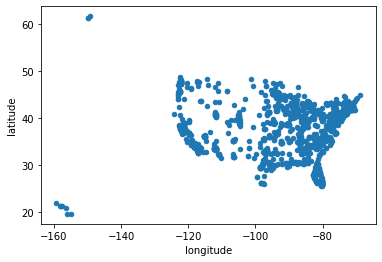

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

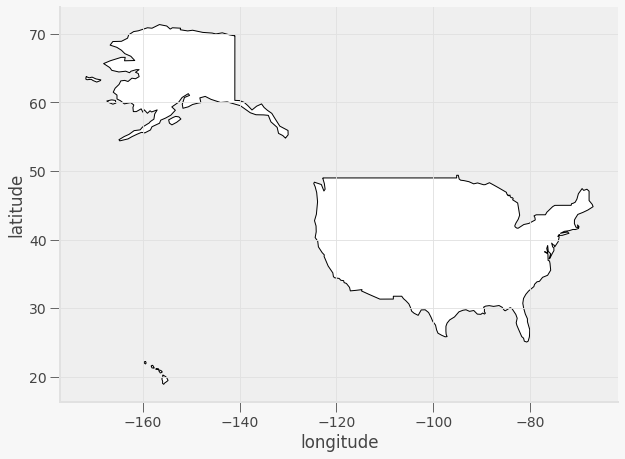

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

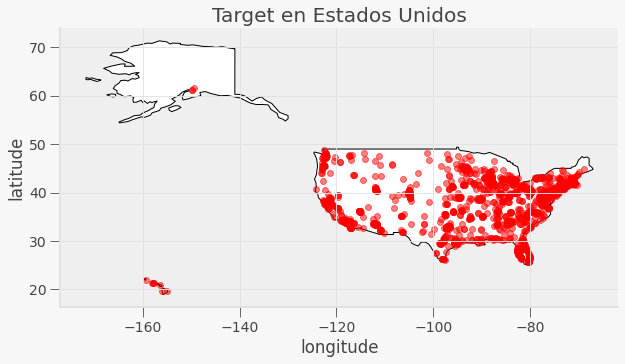

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

#Kmeans

In [16]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

Ajuste de `11` clusters, el cual mantiene separado la parte continental de USA, Alaska y Hawai

In [17]:
k = 11
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(gdf[['longitude', 'latitude']])

In [18]:
gdf['kmean_group'] = y_pred
latlong = gdf[['latitude','longitude', 'kmean_group']]

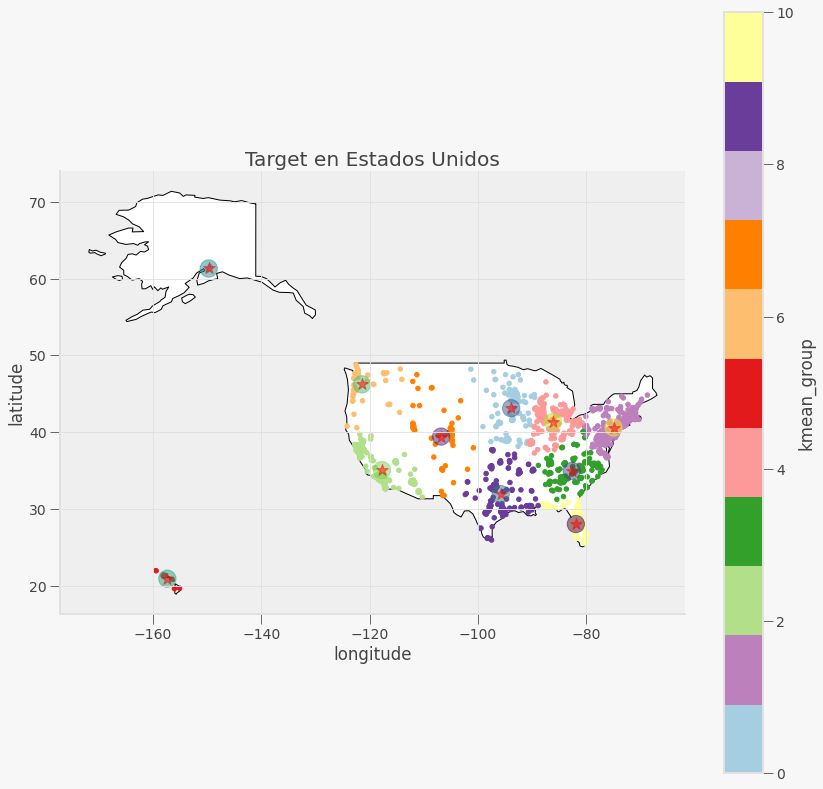

In [19]:
color_list = ['#a6cee3','#bc80bd','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']

fig, gax = plt.subplots(figsize=(14,14))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

latlong.plot.scatter("longitude","latitude", c='kmean_group',cmap=ListedColormap(color_list), ax=gax)
gax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=pd.DataFrame(y_pred)[0].unique(), marker='o', s=300, alpha=0.5)
gax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='*', s=150, alpha=0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

## Librerias adicionales

Utilizando `Nominatim` de geopy, es posible identificar las ciudades correspondientes a las coordenadas geod[esicas calculadas con los centroides de K means

In [20]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

In [21]:
pd.DataFrame(kmeans.cluster_centers_, columns=['latitude','longitude'])

,latitude,longitude
0,-93.873018,43.124358
1,-74.990070,40.614768
2,-117.710721,35.065661
3,-82.689179,34.967383
4,-86.151240,41.337705
5,-157.312251,20.945428
6,-121.419227,46.232484
7,-106.793414,39.438758
8,-149.676793,61.312645
9,-95.807052,31.951976


In [22]:
city = []
for pair in kmeans.cluster_centers_:
  city.append(geolocator.reverse(str(pair[1])+","+str(pair[0])))

Existe una coordenada que el centroide esta en el mar, por lo que se identifica y se sustitue por la mas cercana (Hawai)

In [23]:
#Coordinate not located
geolocator.reverse(str(20.945428)+","+str( -157.312251))

Location(United States, (39.7837304, -100.445882, 0.0))

In [24]:
gdf[gdf['kmean_group']==5]

,name,latitude,longitude,address,phone,website,Coordinates,kmean_group
527,Hawaii Hilo,19.701031,-155.059994,"391 E Makaala St., Hilo, HI 96720-5146",808-920-8605,https://www.target.com/sl/hawaii-hilo/2682,POINT (-155.05999 19.70103),5
528,Maui Kahului,20.874842,-156.456209,"100 Hookele St, Kahului, HI 96732-3509",808-359-2829,https://www.target.com/sl/maui-kahului/2660,POINT (-156.45621 20.87484),5
529,Oahu Kailua,21.391428,-157.739430,"345 Hahani St, Kailua, HI 96734-2838",808-489-9319,https://www.target.com/sl/oahu-kailua/2697,POINT (-157.73943 21.39143),5
530,Hawaii Kona,19.647855,-156.002677,"74-5455 Makala Blvd, Kailua Kona, HI 96740-2727",808-334-4020,https://www.target.com/sl/hawaii-kona/2412,POINT (-156.00268 19.64786),5
531,Oahu Kapolei,21.331204,-158.090252,"4450 Kapolei Pkwy, Kapolei, HI 96707-1878",808-457-3679,https://www.target.com/sl/oahu-kapolei/2411,POINT (-158.09025 21.33120),5
532,Lihue Kauai,21.968086,-159.376962,"4303 Nawiliwili Rd, Lihue, HI 96766-9581",808-212-0223,https://www.target.com/sl/lihue-kauai/3400,POINT (-159.37696 21.96809),5
533,Oahu Honolulu Salt Lake,21.356890,-157.928377,"4380 Lawehana St, Honolulu, HI 96818-3137",808-441-3118,https://www.target.com/sl/honolulu/2410,POINT (-157.92838 21.35689),5
534,Oahu Honolulu Ala Moana,21.292086,-157.844105,"1450 Ala Moana Blvd, Ste 2401, Honolulu, HI 96...",808-206-7162,https://www.target.com/sl/honolulu/2870,POINT (-157.84411 21.29209),5


In [25]:
#Test the closest to the kmean center
geolocator.reverse(str( 	20.874842)+","+str( 	-156.456209 	))

Location(Supercuts, 80, Ho'okele Street, Puʻunene, Kahului, Maui County, Hawaii, 96732, United States, (20.8748728, -156.4567033, 0.0))

In [26]:
#Replace the not located
city[5] = geolocator.reverse(str( 	20.874842)+","+str( 	-156.456209 	))

In [27]:
city

[Location(Ford Avenue, Hancock County, Iowa, 50484, United States, (43.12435853707912, -93.87139267262242, 0.0)),
 Location(Rose Hill Court, Union, Hunterdon County, New Jersey, 08827, United States, (40.6170273, -74.9901945, 0.0)),
 Location(Kern County, CAL Fire Southern Region, California, United States, (35.3145701, -118.753822, 0.0)),
 Location(Perryville Drive, Pickens County, South Carolina, United States, (34.9667373, -82.6906706, 0.0)),
 Location(9B Road, Marshall County, Indiana, 46563, United States, (41.33915197365576, -86.1512243541208, 0.0)),
 Location(Supercuts, 80, Ho'okele Street, Puʻunene, Kahului, Maui County, Hawaii, 96732, United States, (20.8748728, -156.4567033, 0.0)),
 Location(Yakima County, Washington, United States, (46.4135961, -120.730253, 0.0)),
 Location(Eagle County, Colorado, United States, (39.6161124, -106.7172844, 0.0)),
 Location(Anchorage, Alaska, United States, (61.1758781, -149.1107333, 0.0)),
 Location(FM 860, Bois d'Arc, Anderson County, Texas,

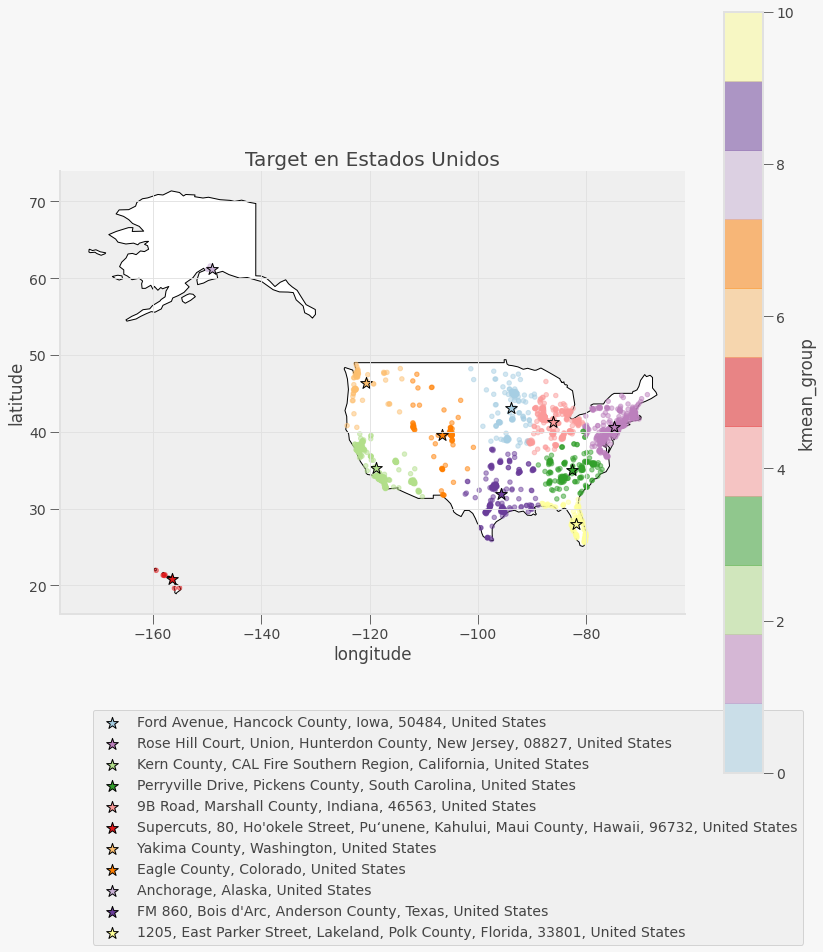

In [28]:
i=0
fig, gax = plt.subplots(figsize=(14,14))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

latlong.plot.scatter("longitude","latitude", c='kmean_group',cmap=ListedColormap(color_list), ax=gax, alpha=0.5)

for cit in city:
    gax.scatter(cit[1][1], cit[1][0], c=color_list[i], marker='*', s=150, edgecolors='black', label=cit[0])
    i += 1

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.legend(bbox_to_anchor= (1.2, -0.2))
plt.show()

## Distancias

Calculamos la distancia entre las tiendas y los centroides identificados para los almacenes

In [29]:
gdf['warehouse'] = Point(0,0)
gdf['warehouse'] =gdf['warehouse'].astype('geometry')

i=0
for cit in city:
    gdf.loc[gdf['kmean_group']==i,'warehouse'] = Point(cit[1][1],cit[1][0])
    i += 1

In [30]:
gdf.sample(5)

,name,latitude,longitude,address,phone,website,Coordinates,kmean_group,warehouse
1746,Red Mill,36.755396,-76.010358,"2233 Upton Dr, Virginia Beach, VA 23454-1186",757-430-5100,https://www.target.com/sl/virginia-beach/2396,POINT (-76.01036 36.75540),1,POINT (-74.99019 40.61703)
1062,Nashua,42.701522,-71.436354,"310 Daniel Webster Hwy, Nashua, NH 03060-5730",603-891-4858,https://www.target.com/sl/nashua/1228,POINT (-71.43635 42.70152),1,POINT (-74.99019 40.61703)
547,Bolingbrook,41.705225,-88.122122,"1188 W Boughton Rd, Bolingbrook, IL 60440-1508",630-378-5544,https://www.target.com/sl/bolingbrook/867,POINT (-88.12212 41.70522),4,POINT (-86.15122 41.33915)
326,Bethel,41.414463,-73.401998,"7 Stony Hill Rd, Bethel, CT 06801-1030",203-448-1029,https://www.target.com/sl/bethel/1528,POINT (-73.40200 41.41446),1,POINT (-74.99019 40.61703)
706,Little Rock North,34.788100,-92.229048,"4000 McCain Blvd, North Little Rock, AR 72116-...",501-771-4220,https://www.target.com/sl/little-rock-north/162,POINT (-92.22905 34.78810),9,POINT (-95.80706 31.95786)


Clacular las distancias en grados a los centros calculados por Kmeans

In [31]:
gdf['disntace_deg'] = gdf.distance(gdf['warehouse'])

gdf.sample(5)

,name,latitude,longitude,address,phone,website,Coordinates,kmean_group,warehouse,disntace_deg
708,Salina,38.784179,-97.608880,"2939 Market Pl, Salina, KS 67401-8598",785-825-1354,https://www.target.com/sl/salina/905,POINT (-97.60888 38.78418),0,POINT (-93.87139 43.12436),5.727650
667,Ft Wayne Glenbrook,41.111524,-85.138699,"3801 Coldwater Rd, Fort Wayne, IN 46805-1101",260-470-6360,https://www.target.com/sl/fort-wayne/2217,POINT (-85.13870 41.11152),4,POINT (-86.15122 41.33915),1.037797
1342,Toledo Monroe Street,41.698934,-83.654293,"5225 Monroe St, Toledo, OH 43623-3139",419-843-3441,https://www.target.com/sl/toledo/623,POINT (-83.65429 41.69893),4,POINT (-86.15122 41.33915),2.522718
946,Stillwater,45.037320,-92.837914,"2021 Market Dr, Stillwater, MN 55082-7546",651-439-0292,https://www.target.com/sl/stillwater/931,POINT (-92.83791 45.03732),0,POINT (-93.87139 43.12436),2.174281
299,Superior,39.955636,-105.170351,"400 Marshall Rd, Superior, CO 80027-8623",303-209-0106,https://www.target.com/sl/superior/1769,POINT (-105.17035 39.95564),7,POINT (-106.71728 39.61611),1.583755


Clacular las distancias en kilometros a los centros calculados por Kmeans

In [32]:
def haversine(coord1, coord2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    import math
    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    km = round(km, 3)
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")

    return km

In [33]:
gdf_new = gdf.copy()

for row in gdf_new.index:
  gdf_new.at[row, 'distance_km'] = haversine([gdf_new['warehouse'][row].x,gdf_new['warehouse'][row].y],
                                             [gdf_new['Coordinates'][row].x,gdf_new['Coordinates'][row].y])

In [34]:
gdf_new.head()

,name,latitude,longitude,address,phone,website,Coordinates,kmean_group,warehouse,disntace_deg,distance_km
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),3,POINT (-82.69067 34.96674),4.467354,425.403
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),3,POINT (-82.69067 34.96674),4.598517,435.197
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),10,POINT (-81.94025 28.05141),6.479206,643.168
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),3,POINT (-82.69067 34.96674),4.300154,393.624
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),3,POINT (-82.69067 34.96674),4.614019,484.915


In [35]:
#Diccionario de ciudades y colores para graficas

city_colors = dict(zip([str(city[0]) for city in city], color_list))
city_list = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in city_colors.values()]

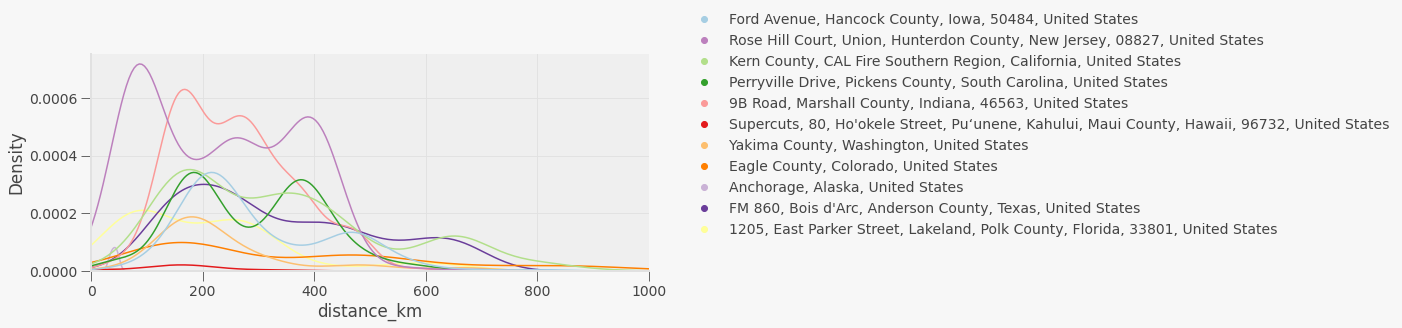

In [36]:
fig, ax = plt.subplots(figsize=(10,4))

sns.kdeplot(data=gdf_new, x='distance_km', hue='kmean_group', 
            palette=ListedColormap(color_list))

ax.legend(city_list, city_colors.keys(), numpoints=1, bbox_to_anchor =(1.05, 0.1), ncol=1)

ax.get_legend().set_frame_on(False)
plt.xlim(0, 1000)

plt.show()

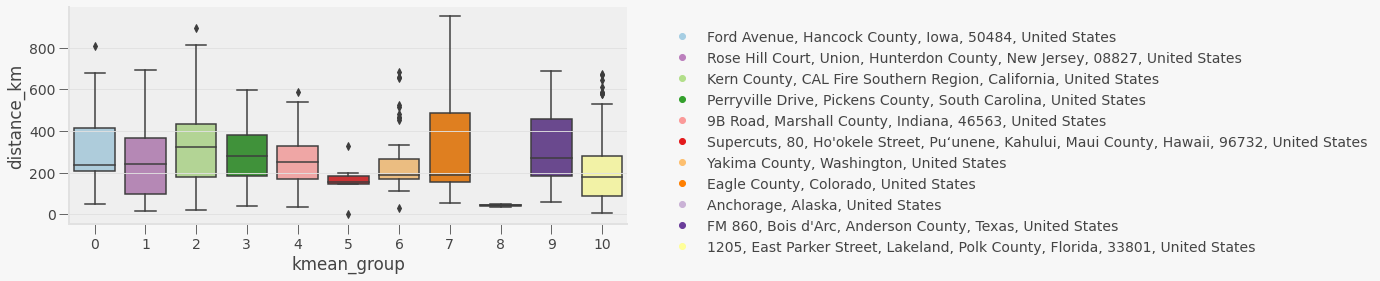

In [37]:
fig, ax = plt.subplots(figsize=(10,4))

sns.boxplot(data=gdf_new, y='distance_km', x='kmean_group',  palette=color_list)
ax.legend(city_list, city_colors.keys(), numpoints=1, bbox_to_anchor =(1.05, 0.95), ncol=1)
ax.get_legend().set_frame_on(False)
plt.show()

In [49]:
pd.DataFrame(gdf_new.groupby('kmean_group').agg(count=('kmean_group', 'size'), 
                                                mean_dist=('distance_km', 'mean'), 
                                                max_dist=('distance_km', 'max'),
                                                min_dist=('distance_km', 'min')))

,count,mean_dist,max_dist,min_dist
kmean_group,,,,
0,151,296.176834,807.745,50.245
1,422,232.783334,693.250,13.717
2,263,338.708996,891.968,20.259
3,181,286.016254,595.204,37.635
4,306,256.458487,588.974,32.663
5,8,162.586750,325.802,0.051
6,72,237.703111,681.281,28.195
7,86,349.476570,949.216,54.023
8,3,41.183000,47.337,34.552


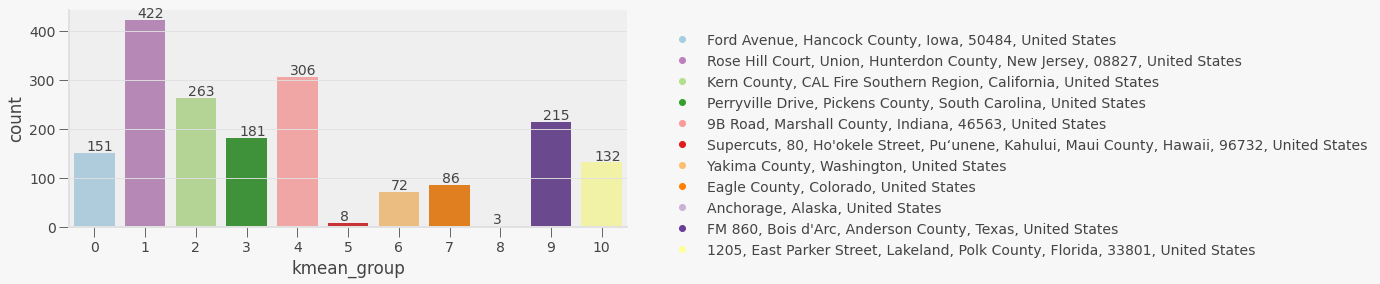

In [38]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(data = gdf_new, x ='kmean_group',  palette=color_list)

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.25,p.get_height()+5))

ax.legend(city_list, city_colors.keys(), numpoints=1, bbox_to_anchor =(1.05, 0.95), ncol=1)
ax.get_legend().set_frame_on(False)
plt.show()

In [57]:
conteo = pd.DataFrame(gdf_new.groupby('kmean_group').agg(count=('kmean_group', 'size'), 
                                                         mean_dist=('distance_km', 'mean'), 
                                                         max_dist=('distance_km', 'max'),
                                                         min_dist=('distance_km', 'min')))

for row in conteo.index:
  conteo.at[row, 'city'] = city[row][0]
  conteo.at[row, 'Coordinates'] = str(city[row][1])
display(conteo)

,count,mean_dist,max_dist,min_dist,city,Coordinates
kmean_group,,,,,,
0,151,296.176834,807.745,50.245,"Ford Avenue, Hancock County, Iowa, 50484, Unit...","(43.12435853707912, -93.87139267262242)"
1,422,232.783334,693.250,13.717,"Rose Hill Court, Union, Hunterdon County, New ...","(40.6170273, -74.9901945)"
2,263,338.708996,891.968,20.259,"Kern County, CAL Fire Southern Region, Califor...","(35.3145701, -118.753822)"
3,181,286.016254,595.204,37.635,"Perryville Drive, Pickens County, South Caroli...","(34.9667373, -82.6906706)"
4,306,256.458487,588.974,32.663,"9B Road, Marshall County, Indiana, 46563, Unit...","(41.33915197365576, -86.1512243541208)"
5,8,162.586750,325.802,0.051,"Supercuts, 80, Ho'okele Street, Puʻunene, Kahu...","(20.8748728, -156.4567033)"
6,72,237.703111,681.281,28.195,"Yakima County, Washington, United States","(46.4135961, -120.730253)"
7,86,349.476570,949.216,54.023,"Eagle County, Colorado, United States","(39.6161124, -106.7172844)"
8,3,41.183000,47.337,34.552,"Anchorage, Alaska, United States","(61.1758781, -149.1107333)"


# Conclusiones


>Utilizando `11` grupos, se puede separar de forma optima los almacenes a lo largo de USA. Con esos `11` almacenes, se mantiene una distancia promedio de 300km en general para los almacenes en la sección continental de USA, y se mantienen independientes Alaska y Hawái.

>La tabla anterior muestra la lista de las ciudades estimadas a partir de los centroides de cada grupo, asignado para los almacenes, así como sus coordenadas y métricas de distancia y cantidad de tiendas a surtir.

>Se observa que el almacén de ID #1 `(Rose Hill Court, Union, Hunterdon County)` surtirá a la mayor cantidad de tiendas, con `422`.

>Así mismo, el almacén de ID #8 `(Eagle County, Colorado)` es el que tiene la tienda más alejada, con `950km`.

>El siguiente mapa muestra la distribución de las tiendas y almacenes estimados para todo el territorio:

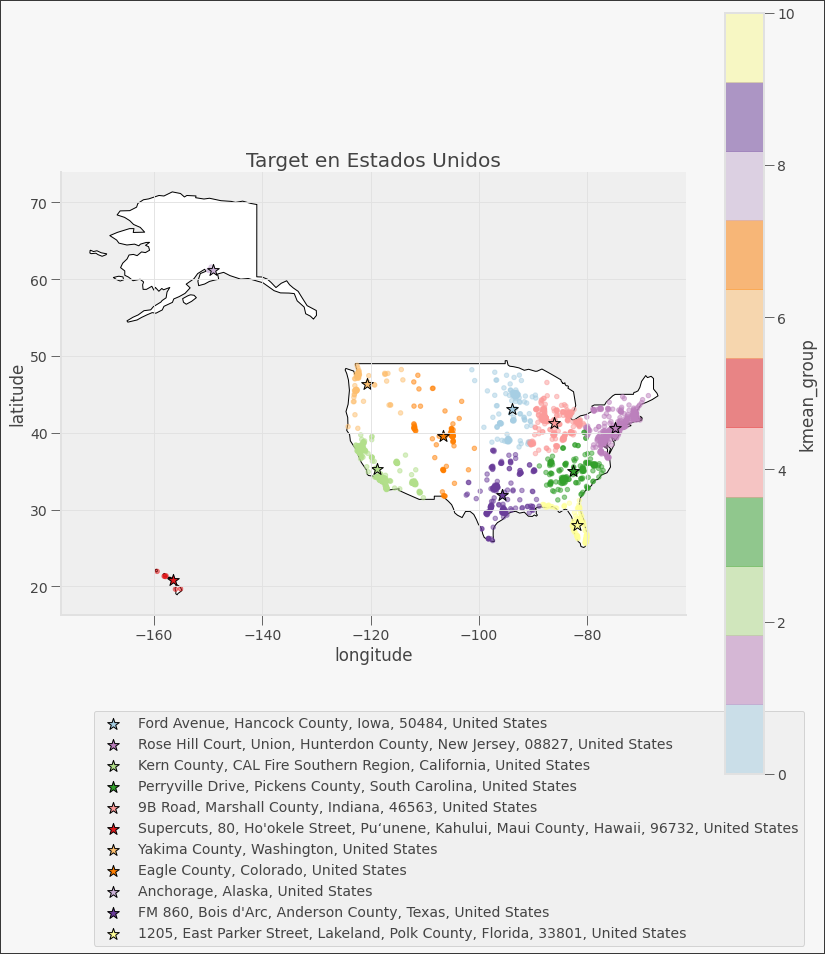
